In [84]:
import geopandas as gpd
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

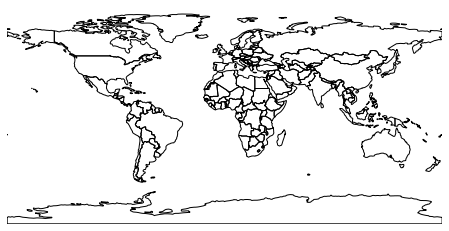

In [6]:
geoplot.polyplot(world, figsize=(8, 4))

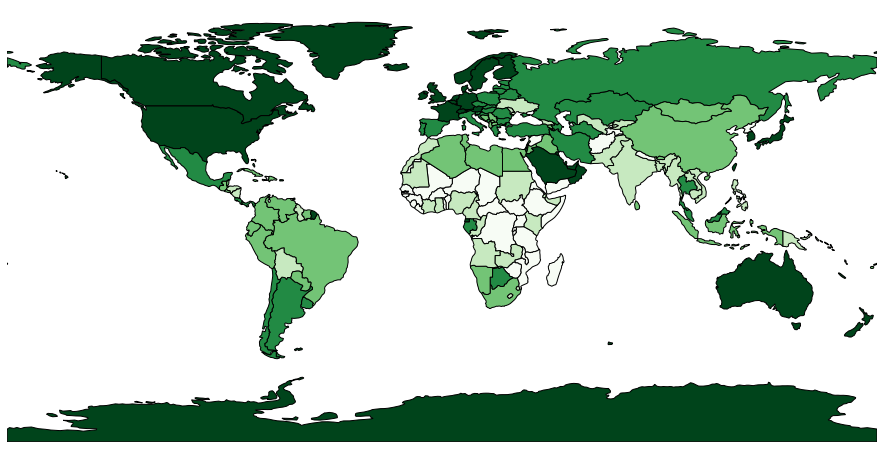

In [8]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(16, 8)
)

In [9]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
boroughs.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [11]:
collisions.head()

,id,NUMBER OF PERSONS INJURED,BOROUGH,geometry
0,11,1,BROOKLYN,POINT (-73.94268 40.67650)
1,21,1,MANHATTAN,POINT (-74.00834 40.72132)
2,27,1,BROOKLYN,POINT (-73.97076 40.68764)
3,28,1,BRONX,POINT (-73.83874 40.88127)
4,33,1,BROOKLYN,POINT (-73.98873 40.59300)


In [12]:
import pandas as pd
fraud = pd.read_csv('./Datasets/Fraud_Data_with_country.csv')
fraud.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [13]:
df = pd.DataFrame(data={'Country':fraud.ip_country.unique(), 'fraud_rate': ''})

In [30]:
fraud['class'][fraud['ip_country'] == 'United States'].value_counts()

0    52498
1     5551
Name: class, dtype: int64

In [46]:
df_fraud.shape

(110, 2)

In [67]:
error_country = []
for c in fraud.ip_country.unique():
    try:
        fraud['class'][fraud['ip_country'] == c].value_counts()[1]
    except KeyError:
        error_country += [c]
fraud[fraud['ip_country'].isin(error_country)]['class'].value_counts()

0    517
Name: class, dtype: int64

In [43]:
df_fraud = df[~df['Country'].isin(error_country)]

In [44]:
df_fraud.head()

,Country,fraud_rate
0,Japan,
1,United States,
2,Unknown,
3,Canada,
4,China,


In [53]:
df_fraud['fraud_rate_inside'] = df_fraud.df_fraud.fraud_rate.sum()ountry.apply(lambda x: (fraud['class'][fraud['ip_country'] == x].value_counts()[1] / fraud['class'][fraud['ip_country'] == x].value_counts().values.sum()) * 100 )

In [56]:
df_fraud.fraud_rate = df_fraud.Country.apply(lambda x: (fraud['class'][fraud['ip_country'] == x].value_counts()[1] / fraud['class'].value_counts()[1]) * 100 )

In [57]:
df_fraud.head(20)

,Country,fraud_rate,fraud_rate_inside
0,Japan,5.052646,9.786477
1,United States,39.226910,9.562611
2,Unknown,13.306480,8.572339
3,Canada,2.459190,11.697479
4,China,7.370504,8.664230
5,Brazil,1.907992,9.118541
6,India,1.067062,11.526718
7,Argentina,0.466398,9.984871
8,United Kingdom,3.370787,10.623608
9,South Africa,0.522931,8.830549


In [68]:
df_no_fraud = pd.DataFrame(data={'Country':error_country, 'fraud_rate':0, 'fraud_rate_inside':0})

In [80]:
geo = pd.concat([df_fraud, df_no_fraud])

In [81]:
geo.shape

(182, 3)

In [86]:
shapefile = './World_Map/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [87]:
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

country country_code  \
159  Antarctica          ATA   

                                              geometry  
159  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...  


In [88]:
geo.head()

,Country,fraud_rate,fraud_rate_inside
0,Japan,5.052646,9.786477
1,United States,39.226910,9.562611
2,Unknown,13.306480,8.572339
3,Canada,2.459190,11.697479
4,China,7.370504,8.664230


In [111]:
import country_converter as coco

In [113]:
geo['ISO3'] = geo.Country.apply(lambda x: coco.convert(names=x, to='ISO3'))

In [120]:
geo.ISO3.shape

(182,)

In [117]:
geo[geo.Country == 'European Union']

,Country,fraud_rate,fraud_rate_inside,ISO3
32,European Union,0.098933,5.882353,not found


In [119]:
#Merge dataframes gdf and df_2016.
merged = gdf.merge(geo, left_on = 'country_code', right_on = 'ISO3')
merged.shape

(149, 7)

In [144]:
merged.fraud_rate_inside.sort_values()

0        0.000000
36       0.000000
79       0.000000
38       0.000000
39       0.000000
          ...    
35      26.415094
107     38.888889
116     41.935484
41      43.478261
85     100.000000
Name: fraud_rate_inside, Length: 149, dtype: float64

In [121]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [140]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

In [143]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['Spectral'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 16)
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '2': '2%', '4':'4%', '6':'6%', '8':'8%', '10':'10%', '12':'12%','14':'14%', '16': '>16%'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Repartition of fraud in the World, 2015', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'fraud_rate', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...

In [148]:
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['Set3'][9]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 100)
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '10':'10%', '20':'20%', '30':'30%', '40': '40%', '50': '50%',  '60':'60%',  '70':'70%',  '80':'80%', '90': '>90%'}
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Percentage of fraud inside the Country, 2015', plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'fraud_rate_inside', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

Loading BokehJS ...